<a href="https://colab.research.google.com/github/Vaish-922/TensorFlowSMP/blob/main/TensorFlow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

In [ ]:
X_train, y_train = tfds.as_numpy(tfds.load(
    'mnist',
    split = 'train',
    batch_size = -1,
    as_supervised = True
))

X_test, y_test = tfds.as_numpy(tfds.load(
    'mnist',
    split = 'test',
    batch_size = -1,
    as_supervised = True
))



local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


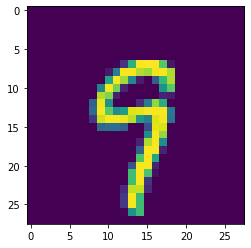

In [ ]:

plt.imshow(X_train[100].reshape(28,28))

In [ ]:
def build_m1(X_train):
  model1= Sequential([
                      Conv2D(32,(3,3),activation='relu', input_shape=X_train.shape[1:]),
                      MaxPool2D((2,2)),
                      Conv2D(16,(3,3),activation='sigmoid'),
                      MaxPool2D((2,2)),
                      Flatten(),
                      Dense(100, activation='relu'),
                      Dense(10,activation='softmax')
  ])
  return model1

In [ ]:
def build_m2(X_train):
  model2 = Sequential([
                      Conv2D(64,(3,3),activation='relu', input_shape= X_train.shape[1:]),
                      MaxPool2D((2,2)),
                      Conv2D(32,(3,3),activation='sigmoid'),
                      MaxPool2D((2,2)),
                      Conv2D(16,(2,2),activation='sigmoid'),
                      MaxPool2D((2,2)),
                      Flatten(),
                      Dense(32, activation='relu'),
                      Dense(10,activation='softmax')
                      
  ])
  return model2

In [ ]:
m1=build_m1(X_train)
m2=build_m2(X_train)
m1.summary()
m2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)              

In [ ]:
m1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
m2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
his1=m1.fit(X_train,y_train,epochs = 20, validation_data=(X_test,y_test))
his2=m2.fit(X_train,y_train,epochs = 20, validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 48s 3ms/step - loss: 0.4925 - accuracy: 0.8528 - val_loss: 0.0954 - val_accuracy: 0.9708
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9670 - val_loss: 0.0674 - val_accuracy: 0.9783
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9752 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0558 - val_accuracy: 0.9823
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9816 - val_loss: 0.0589 - val_accuracy: 0.9807
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9824 - val_loss: 0.0573 - val_accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9847 - val_loss: 0.0552 - val_accuracy

2


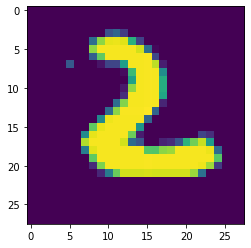

In [ ]:
img = X_test[200]
plt.imshow(img.reshape(28,28))
print(y_test[200])

In [ ]:
pred = m1.predict(img.reshape(1,28,28,1))[0]
print(pred)

pred = m2.predict(img.reshape(1,28,28,1))[0]
print(pred)

[1.6304826e-08 9.1615773e-09 9.9999988e-01 5.7310690e-09 1.1350884e-08
 1.4650737e-13 3.8001319e-10 1.1696014e-09 7.0042937e-08 7.5227213e-17]
[1.1597492e-06 7.1291493e-07 9.9999738e-01 5.4450786e-09 1.5275450e-07
 5.0366227e-13 4.9570912e-07 9.5548609e-09 2.2948653e-08 4.9871254e-09]


<Figure size 432x288 with 0 Axes>

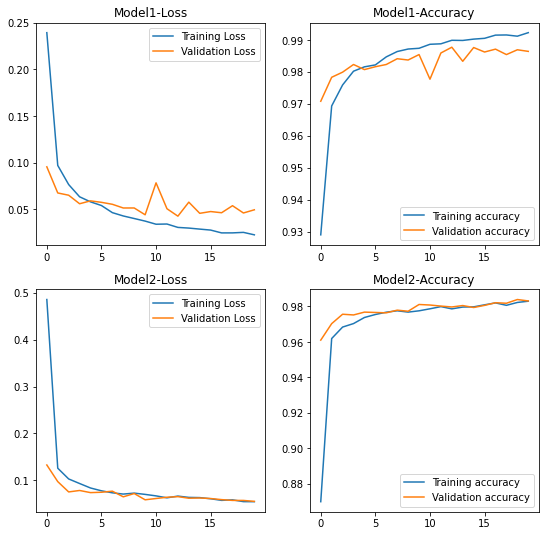

In [ ]:
plt.figure()
fig,a=plt.subplots(2,2,figsize=(9,9))

a[0,0].plot(his1.history['loss'])
a[0,0].plot(his1.history['val_loss'])
a[0,0].legend(['Training Loss', 'Validation Loss'])
a[0,0].title.set_text('Model1-Loss')

a[0,1].plot(his1.history['accuracy'])
a[0,1].plot(his1.history['val_accuracy'])
a[0,1].legend(['Training accuracy', 'Validation accuracy'])
a[0,1].title.set_text('Model1-Accuracy')

a[1,0].plot(his2.history['loss'])
a[1,0].plot(his2.history['val_loss'])
a[1,0].legend(['Training Loss', 'Validation Loss'])
a[1,0].title.set_text('Model2-Loss')

a[1,1].plot(his2.history['accuracy'])
a[1,1].plot(his2.history['val_accuracy'])
a[1,1].legend(['Training accuracy', 'Validation accuracy'])
a[1,1].title.set_text('Model2-Accuracy')

